In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# -------- transfer learning data --------
init0_BayBE = np.array(pd.read_csv("init_0_BayBE_5round.csv")['Target'])
baybe_data0 = init0_BayBE.reshape(5, 30)

init1_BayBE = np.array(pd.read_csv("init_1_BayBE_5round.csv")['Target'])
baybe_data1 = init1_BayBE.reshape(5, 30)

init5_BayBE = np.array(pd.read_csv("init_5_BayBE_5round.csv")['Target'])
baybe_data5 = init5_BayBE.reshape(5, 30)

init10_BayBE = np.array(pd.read_csv("init_10_BayBE_5round.csv")['Target'])
baybe_data10 = init10_BayBE.reshape(5, 30)

init20_BayBE = np.array(pd.read_csv("init_20_BayBE_5round.csv")['Target'])
baybe_data20 = init20_BayBE.reshape(5, 30)

ax_data0 = np.loadtxt("init_0_Ax_5round.csv")
ax_data1 = np.loadtxt("init_1_Ax_5round.csv")
ax_data5 = np.loadtxt("init_5_Ax_5round.csv")
ax_data10 = np.loadtxt("init_10_Ax_5round.csv")
ax_data20 = np.loadtxt("init_20_Ax_5round.csv")

# -------- BO data --------, reshape, so the plain optimization has the same shape as transfer learning
bo_baybe = np.loadtxt('AdvOpt-BayBE.csv')
bo_baybe = bo_baybe[:5, :30]

bo_ax = np.loadtxt('AdvOpt-Ax.csv')
bo_ax = bo_ax[:5, :30]

Text(0, 0.5, 'Best observed value')

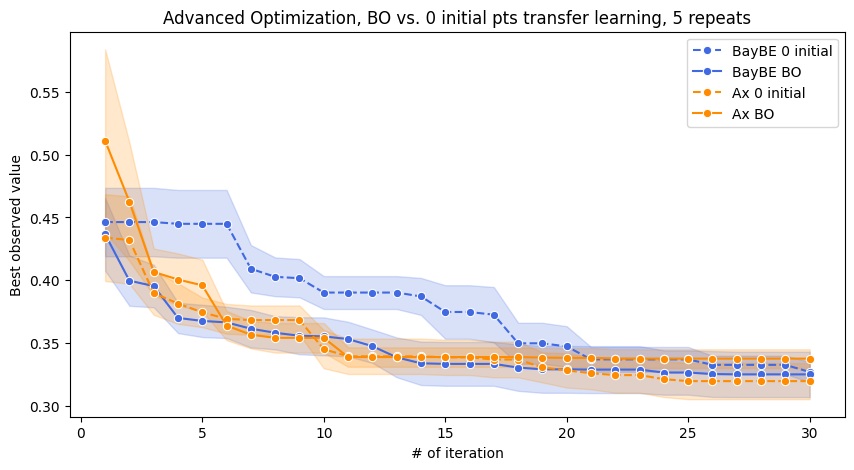

In [34]:
data_files = [baybe_data0, bo_baybe, ax_data0, bo_ax]
labels = ['BayBE 0 initial', 'BayBE BO', 'Ax 0 initial', 'Ax BO']

# -------- plot --------
plt.figure(figsize=(10, 5))
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 5 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(5) # Standard deviation across the 5 repeats
    if i ==0 or i ==1: 
        corlor = 'royalblue'         # BayBE
    else: 
        corlor = 'darkorange'          # Ax  

    if i == 0 or i ==2: 
        sns.lineplot(x=range(1, len(mean)+1), y=mean, label=labels[i], linestyle='dashed', marker='o', color = corlor)
    else:
        sns.lineplot(x=range(1, len(mean)+1), y=mean, label=labels[i], marker='o', color = corlor)
    plt.fill_between(range(1, len(mean)+1), mean - std_dev, mean + std_dev, alpha=0.2, color=corlor)

plt.title("Advanced Optimization, BO vs. 0 initial pts transfer learning, 5 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
# plt.legend(title="Number of Data Points")

### plot Ax and BayBE on same plot

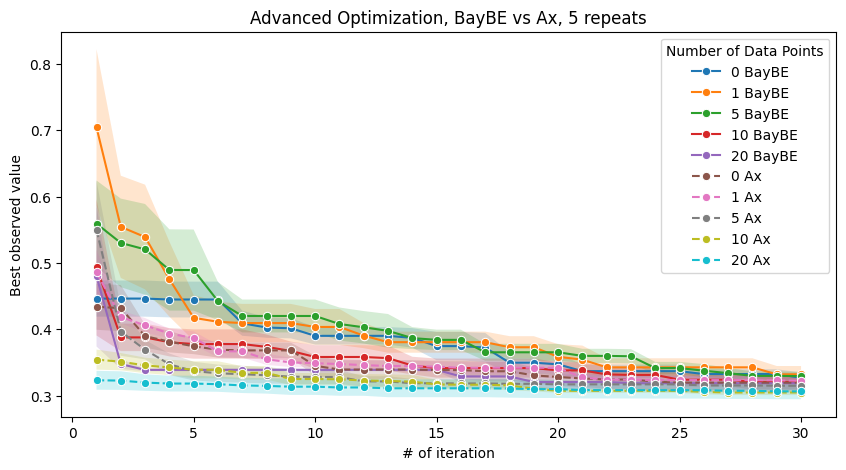

In [35]:
data_files = [baybe_data0, baybe_data1, baybe_data5, baybe_data10, baybe_data20, 
              ax_data0, ax_data1, ax_data5, ax_data10, ax_data20]
labels = ['0 BayBE', '1 BayBE', '5 BayBE', '10 BayBE', '20 BayBE',
          '0 Ax', '1 Ax', '5 Ax', '10 Ax', '20 Ax']

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
plt.figure(figsize=(10, 5))
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 5 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(5) # Standard deviation across the 5 repeats
    if i < 5:
        sns.lineplot(x=range(1, len(mean)+1), y=mean, label=labels[i], marker = 'o')
    else:
        sns.lineplot(x=range(1, len(mean)+1), y=mean, label=labels[i], linestyle='dashed', marker = 'o')
    plt.fill_between(range(1, len(mean)+1), mean-std_dev, mean+std_dev, alpha=0.2)

# Customize plot
plt.title("Advanced Optimization, BayBE vs Ax, 5 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")

### Ax, transfer learning

(0.29, 0.82)

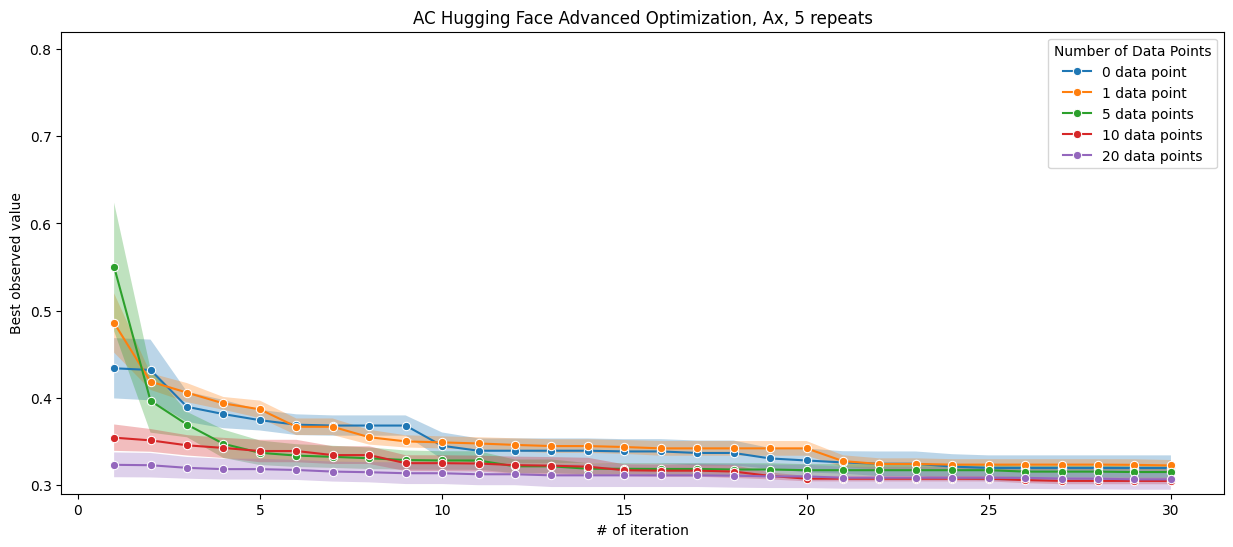

In [36]:
# group the data
data_files = [ax_data0, ax_data1, ax_data5, ax_data10, ax_data20]
labels = ['0 data point', '1 data point', '5 data points', '10 data points', '20 data points']

# Create a figure
plt.figure(figsize=(15, 6))

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 5 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(5) # Standard deviation across the 5 repeats

    # Plot with seaborn
    sns.lineplot(x=range(1, len(mean) + 1), y=mean, label=labels[i], marker='o')
    plt.fill_between(range(1, len(mean) + 1), mean - std_dev, mean + std_dev, alpha=0.3)

# Customize plot
plt.title("AC Hugging Face Advanced Optimization, Ax, 5 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")
plt.ylim(0.29, 0.82)

### BayBE, transfer learning

(0.29, 0.82)

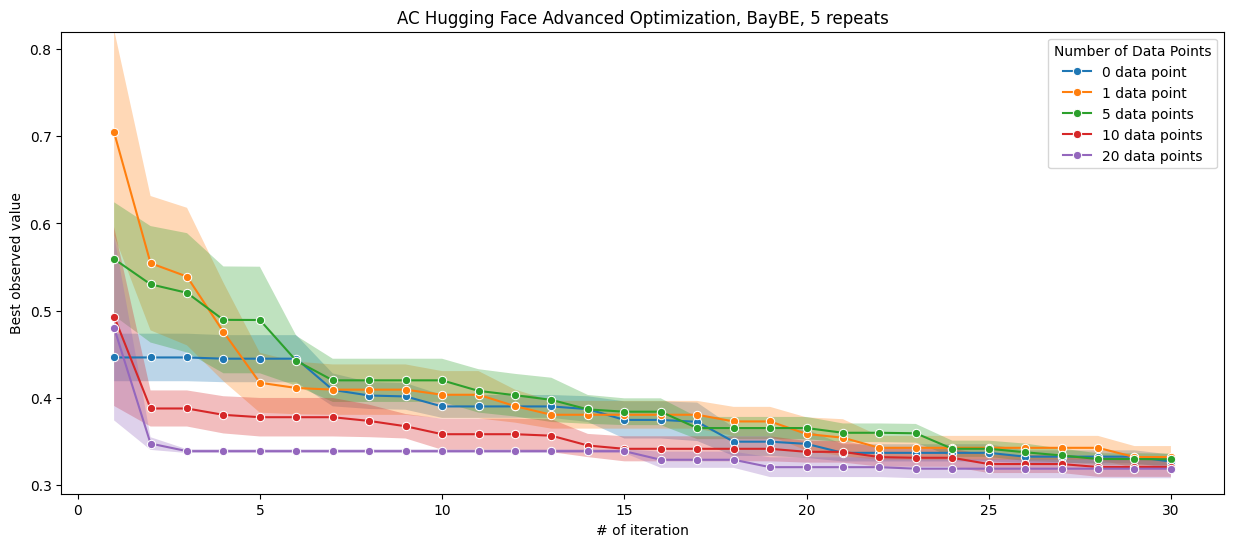

In [37]:
# group the data
data_files = [baybe_data0, baybe_data1, baybe_data5, baybe_data10, baybe_data20]
labels = ['0 data point', '1 data point', '5 data points', '10 data points', '20 data points']

# Create a figure
plt.figure(figsize=(15, 6))

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 5 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(5) # Standard deviation across the 5 repeats

    # Plot with seaborn
    sns.lineplot(x=range(1, len(mean) + 1), y=mean, label=labels[i], marker='o')
    plt.fill_between(range(1, len(mean) + 1), mean - std_dev, mean + std_dev, alpha=0.3)

# Customize plot
plt.title("AC Hugging Face Advanced Optimization, BayBE, 5 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")
plt.ylim(0.29, 0.82)

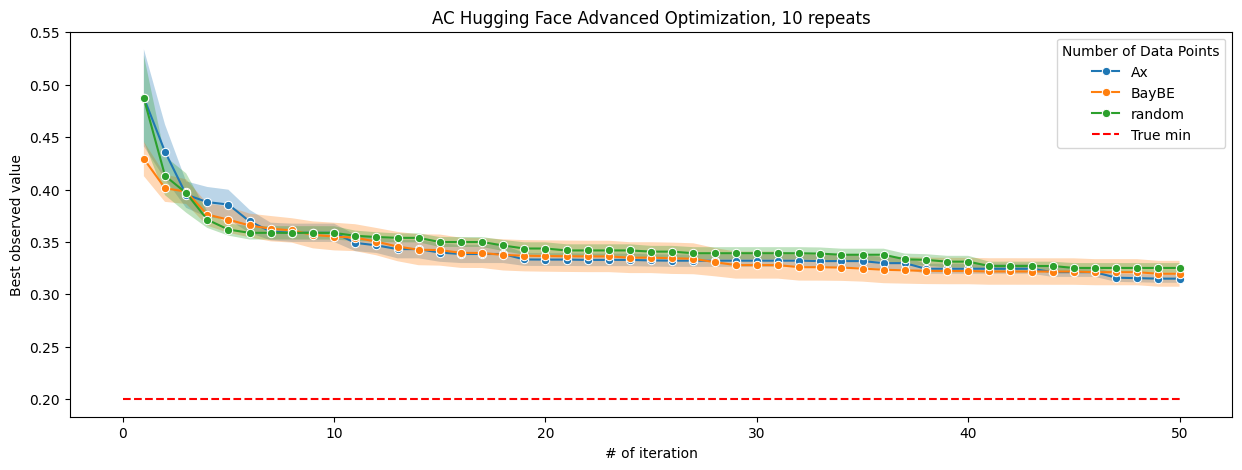

In [40]:
ax_data = np.loadtxt('AdvOpt-Ax.csv')
baybe_data = np.loadtxt('AdvOpt-BayBE.csv')
random_data = np.loadtxt('AdvOpt-random.csv') 

data_files = [ax_data, baybe_data, random_data]
labels = ['Ax', 'BayBE', 'random']

# Create a figure
plt.figure(figsize=(15, 5))

# Iterate through each dataset and calculate cumulative minimum, mean, and std deviation
for i, data in enumerate(data_files):
    cumulative_min = np.minimum.accumulate(data, axis=1)  # Cumulative minimum along the columns
    mean = np.mean(cumulative_min, axis=0)  # Mean across the 10 repeats
    std_dev = np.std(cumulative_min, axis=0) / np.sqrt(10)
      # Standard deviation across the 10 repeats

    # Plot with seaborn
    sns.lineplot(x=range(1, len(mean) + 1), y=mean, label=labels[i], marker='o')
    plt.fill_between(range(1, len(mean) + 1), mean - std_dev, mean + std_dev, alpha=0.3)

# Customize plot
plt.hlines(y=0.2, xmin=0, xmax=50, colors='r', ls='--', label = 'True min')  # Actual optimum for this problem
plt.title("AC Hugging Face Advanced Optimization, 10 repeats")
plt.xlabel("# of iteration")
plt.ylabel("Best observed value")
plt.legend(title="Number of Data Points")